In [2]:
import quspin as qs
import numpy as np
import matplotlib.pyplot as plt
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
from quspin.operators import quantum_operator
import math
from quspin.basis import spin_basis_general

In [4]:
def str_tens(A, B):
    new = []
    for i in A:
        for n in B:
            new.append(i + n)
    return new

def up_pop_plot(L, populations, values, dep_var):
    #basis = [r'0', r'1']
    #labels = [r'0', r'1']
    #for i in range(L - 1):
        #labels = str_tens(labels, basis)
    n_rows = len(populations[0])
    n_cols = len(populations[0][0])
    probs = [[matrix[i][j] for matrix in populations] for i in range(n_rows) for j in range(n_cols)]
    values = values*(10**3)    
    fig, axes = plt.subplots(1, 1)
    for i in range(L):
        axes.plot(values, probs[i], label=f'Particle {i+1}')
        
    #for i in range(5):
        #print(populations[:,1][100*i])

    axes.set_ylabel(r"Probability of detecting $\left|1\right>$", fontsize=20)
    axes.set_xlabel(dep_var, fontsize=20)
    axes.legend(loc=1, prop={'size': 14})

    axes.minorticks_on()
    axes.tick_params(which='major', length=10, width=2, direction='in', bottom=True, top=True, left=True, right=True)
    axes.tick_params(which='minor', length=5, width=2, direction='in', bottom=True, top=True, left=True, right=True)
    axes.set_yticks([0, 0.5, 1]) 
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.savefig(f'{L}_Particle_Spin_Evolution.pdf', bbox_inches='tight')
    
    plt.show(block=False)

In [6]:
#define pulse sequences
def pulse_ramsey(t, pulse_time, free_time, rabi_frequency):
    if t <= pulse_time:
        return rabi_frequency
    elif t < pulse_time + free_time:
        return 0 
    elif t <= 2 * pulse_time + free_time:
        return rabi_frequency
    else:
        return 0

def pulse_single(t, pulse_time, free_time, rabi_frequency):
    if t <= pulse_time:
        return rabi_frequency
    else:
        return 0

def no_pulse(t, pulse_time, free_time, rabi_frequency):
    return 0

In [8]:
pulse_time = 0.0478e-3 # in s
free_time = 15000 * pulse_time # 0.6e-3 # in s
rabi_frequency = 2*np.pi*(1/pulse_time)/4 # From RbCs Ramsey Paper https://doi.org/10.1088/2058-9565/aaee35 Figure 7
print((pulse_time*rabi_frequency)/(np.pi/2)) # Check pulse time and rabi frequency give a pi/2 pulse area 

0.9999999999999999


In [10]:
L = 2

J = 1000 #Hz
det = 0 #detuning
ax, ay = 1, 1 #lattice seperation in x and y directions
row_len = L #Number of sites per row in lattice
params = [pulse_time, free_time, rabi_frequency]

def construct_H(L, J, det, ax, ay, row_len, params, pulse):
    basis = spin_basis_general(N=L, pauli=False)
    print(basis)
    
    #calculate particle position in lattice
    positions = []
    for i in range(L):
        x = (i % row_len)*ax
        y = (i // row_len)*ay
        positions.append([x, y])
    print(positions)

    #construct interaction
    sites = range(L)
    pre_int = [[i, k] for idx, i in enumerate(sites) for k in sites[idx + 1:]]
    #interaction strengths between each particle
    intr = []
    for s in pre_int:
        distance = np.sqrt((positions[s[0]][0]-positions[s[1]][0])**2 + (positions[s[0]][1]-positions[s[1]][1])**2)
        intr.append([1/distance**3, s[0], s[1]])

    #construct resonant and detuning terms
    drive = [[1.0, i] for i in range(L)]
    detuning = [[1.0, i] for i in range(L)]

    operator_list_0 = [['z', detuning]]
    operator_list_1 = [['x', drive]]

    print(intr)

    #construct full Hamiltonian
    interaction = [['+-', intr], ['-+', intr]]
    operator_dict = {'detuning': operator_list_0, 'drive': operator_list_1, 'interaction': interaction}
    H = quantum_operator(operator_dict, basis=basis)
    params_dict = dict(detuning=det, drive=(pulse, params), interaction=J)
    H_lmbda1 = H.tohamiltonian(params_dict)
    return H_lmbda1

H_lmb = construct_H(L, J, det, ax, ay, row_len, params, pulse_ramsey)

print(np.array2string(H_lmb.toarray(), suppress_small=True, formatter={'float': '{:0.4f}'.format}))


reference states: 
array index   /   Fock state   /   integer repr. 
 0.  |1 1>  3 
 1.  |1 0>  2 
 2.  |0 1>  1 
 3.  |0 0>  0 
[[0, 0], [1, 0]]
[[np.float64(1.0), 0, 1]]
Hermiticity check passed!
Symmetry checks passed!
[[    0.        +0.j 16430.92392045+0.j 16430.92392045+0.j
      0.        +0.j]
 [16430.92392045+0.j     0.        +0.j  1000.        +0.j
  16430.92392045+0.j]
 [16430.92392045+0.j  1000.        +0.j     0.        +0.j
  16430.92392045+0.j]
 [    0.        +0.j 16430.92392045+0.j 16430.92392045+0.j
      0.        +0.j]]


In [12]:
#for labelling graphs
def str_tens(A, B):
    new = []
    for i in A:
        for n in B:
            new.append(i + n)
    return new

reference states: 
array index   /   Fock state   /   integer repr. 
 0.  |1 1>  3 
 1.  |1 0>  2 
 2.  |0 1>  1 
 3.  |0 0>  0 
[[0, 0], [1, 0]]
[[np.float64(1.0), 0, 1]]
Hermiticity check passed!
Symmetry checks passed!
(0.0005710021048641917+0.023888135360506903j)
reference states: 
array index   /   Fock state   /   integer repr. 
 0.  |1 1>  3 
 1.  |1 0>  2 
 2.  |0 1>  1 
 3.  |0 0>  0 
[[0, 0], [1, 0]]
[[np.float64(1.0), 0, 1]]
Hermiticity check passed!
Symmetry checks passed!
(0.42642260736039134-0.49445416162982897j)
reference states: 
array index   /   Fock state   /   integer repr. 
 0.  |1 1>  3 
 1.  |1 0>  2 
 2.  |0 1>  1 
 3.  |0 0>  0 
[[0, 0], [1, 0]]
[[np.float64(1.0), 0, 1]]
Hermiticity check passed!
Symmetry checks passed!
(0.9845748116832383-0.12230574622419738j)
reference states: 
array index   /   Fock state   /   integer repr. 
 0.  |1 1>  3 
 1.  |1 0>  2 
 2.  |0 1>  1 
 3.  |0 0>  0 
[[0, 0], [1, 0]]
[[np.float64(1.0), 0, 1]]
Hermiticity check passed!
Symme

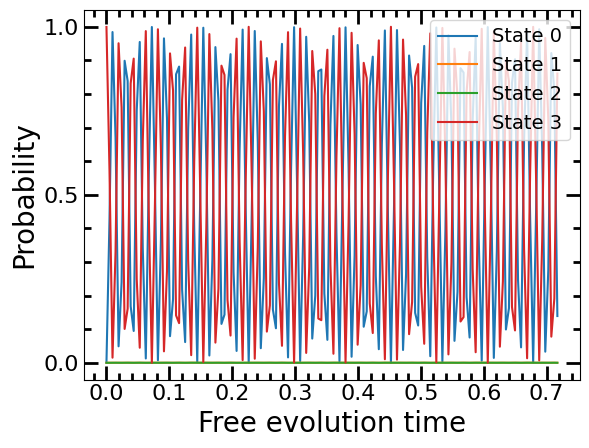

In [14]:
intervals = 150
holds = np.linspace(0, 15000 * pulse_time, intervals)

psi_0 = np.zeros(2**L)
psi_0[0] = 1 
probs = []
for free_time in holds:
    params = [pulse_time, free_time, rabi_frequency]
    H_lmb = construct_H(L, J, 0, ax, ay, row_len, params, pulse_ramsey)
    times = np.linspace(0, 2*pulse_time + free_time, 10)
    populations = H_lmb.evolve(psi_0, 0, times)
    print(populations[0][-1])
    probs.append([abs(populations[0][-1])**2, abs(populations[1][-1])**2, abs(populations[2][-1])**2, abs(populations[3][-1])**2])

fig, axes = plt.subplots(1, 1)
for i in range(2**L):
    axes.plot(holds, [row[i] for row in probs], label=f'State {i}')
        
    #for i in range(5):
        #print(populations[:,1][100*i])

axes.set_ylabel(r"Probability", fontsize=20)
axes.set_xlabel('Free evolution time', fontsize=20)
axes.legend(loc=1, prop={'size': 14})

axes.minorticks_on()
axes.tick_params(which='major', length=10, width=2, direction='in', bottom=True, top=True, left=True, right=True)
axes.tick_params(which='minor', length=5, width=2, direction='in', bottom=True, top=True, left=True, right=True)
axes.set_yticks([0, 0.5, 1]) 
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.savefig(f'{L}_Particle_ramsey.pdf', bbox_inches='tight')
    
plt.show(block=False)


In [15]:
intervals = 64
times = np.linspace(0, 2*pulse_time + free_time, intervals)
psi_0 = np.zeros(2**L)
psi_0[0] = 1  #all spin down
#psi_0[16] = 1  #only middle spin spin up

ket = [r'0', r'1']
labels = [r'0', r'1']
for i in range(L - 1):
    labels = str_tens(labels, ket)
    
populations = H_lmb.evolve(psi_0, 0, times)
print(len(populations))

#fig, axes = plt.subplots(1, 1)
#for i in range(len(populations)):    
    #axes.plot(times, abs(populations[i])**2, label='|' + labels[i] + r'$\rangle$')
#plt.legend()
#plt.show

4


In [16]:
def up_prob(L, row_len, populations):
    basis = spin_basis_general(N=L, pauli=False)
    col_len = int(math.ceil(L/row_len))

    #contruct outer product of single particle up spin state operator to find the probability it is in up
    outer_products = []
    for i in range(L):
        factors = [[[0.5, i]], [[-1, i]]]
        opers = [['I', factors[0]], ['z', factors[1]]]
        input_dict = {'up': opers}
        outer_products.append(quantum_operator(input_dict, basis=basis))
        #__ = quantum_operator(input_dict, basis=basis).tohamiltonian()
        #print(__.toarray())


    #calculate the probability each particle is spin up for each time evolved
    results = []
    for i in np.transpose(populations):
        probs = np.zeros((col_len, row_len))
        for n in range(L):
            if n==4:
                print(outer_products[n].expt_value(i))
            probs[n//row_len][n%row_len] = outer_products[n].expt_value(i)
        results.append(probs)

    #print(results)
    return results

results = up_prob(L, row_len, populations)
    

Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!


/var/folders/ln/c_qknrr51xbgxcyyp59605kr0000gn/T/ipykernel_50169/1076318461.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  probs[n//row_len][n%row_len] = outer_products[n].expt_value(i)


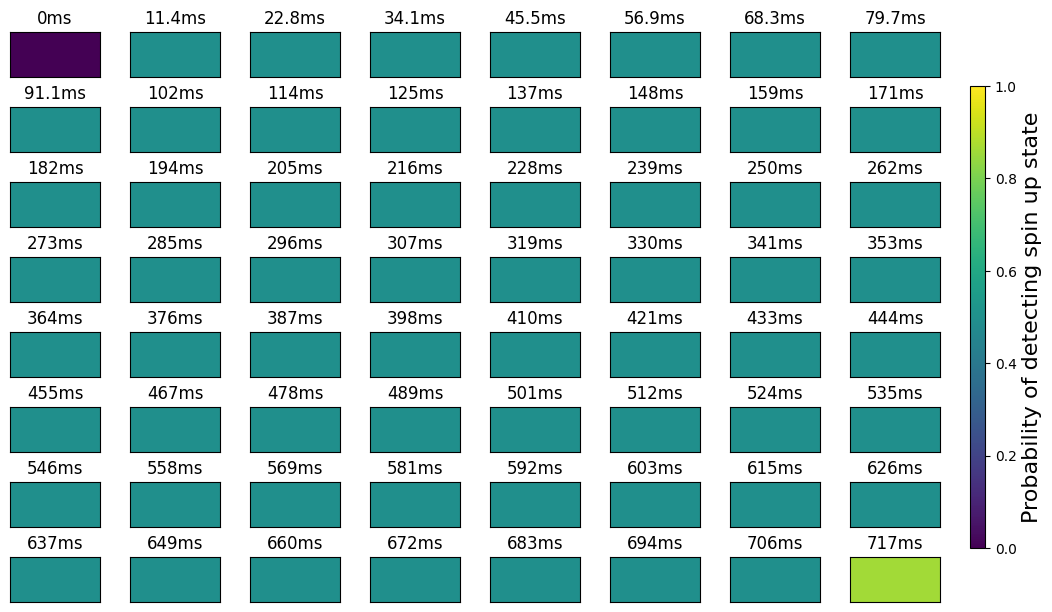

In [17]:
#plot result matricies
from mpl_toolkits.axes_grid1 import ImageGrid

if intervals <= 64:

    dims = int(math.ceil(np.sqrt(len(results))))

    fig = plt.figure(figsize=(1.5*dims, 1.5*dims))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(dims, dims),  # creates grid of Axes
                     axes_pad=0.3,  # pad between Axes in inch.
                     )

    count = 0
    for ax in grid:
        # Iterating over the grid returns the Axes.
        cax = ax.matshow(results[count])
        cax.set_clim(0, 1)
    
        # Hide X and Y axes label marks
        ax.xaxis.set_tick_params(labelbottom=False)
        ax.yaxis.set_tick_params(labelleft=False)

        # Hide X and Y axes tick marks
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title('{:g}'.format(float('{:.3g}'.format(times[count]*(10**3)))) + 'ms')
        count += 1

    cbar = fig.colorbar(cax, location="right", 
            shrink=0.5,
            aspect=30,
            fraction=0.5,
            anchor=(1.1,0.5))

    cbar.ax.set_ylabel('Probability of detecting spin up state', fontsize=16)
    plt.savefig(f'{L}_particles_Arrays_of_spin_probabilities.pdf', bbox_inches='tight')
    plt.show()
else:
    pass




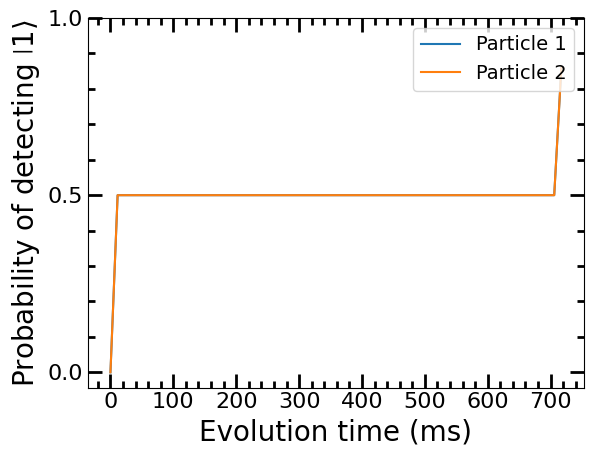

In [18]:
up_pop_plot(L, results, times, 'Evolution time (ms)')

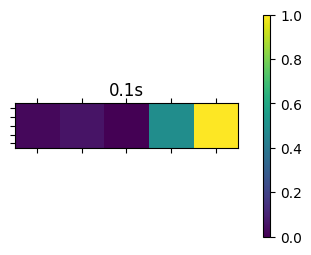

In [351]:
# animation
from matplotlib.animation import PillowWriter

metadata = dict(title='Movie', artist='codinglikemad')
writer = PillowWriter(fps=24, metadata=metadata)

fig, ax = plt.subplots()

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])


cbar.ax.set_ylabel('Probability of detecting spin up state')

with writer.saving(fig, f'{L}_particle_2D_spin.gif', 100):
    cax = ax.matshow(results[0])
    cax.set_clim(0, 1)
    cbar = fig.colorbar(cax, location="right", 
            shrink=0.6,
            aspect=30,
            fraction=0.5)
    count = 0
    for i in results[0:]:
        ax.clear()
        ax.set_title('{:g}'.format(float('{:.3g}'.format(times[count]))) + 's')
        cax = ax.matshow(i)
        writer.grab_frame()
        count += 1
        
    